# pca autoencoder

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from train_utils.train import get_dataloaders

# PCA Autoencoder

class PCAAutoencoder:
  def __init__(self, n_components):
    self.n_components = n_components
    self.pca = PCA(n_components=n_components)
    self.mean = None

  def fit(self, X):
    self.mean = np.mean(X, axis=0)
    X_centered = X - self.mean
    self.pca.fit(X_centered)
    
  def encoder(self, X):
    X_centered = X - self.mean
    return self.pca.transform(X_centered)
  
  def decoder(self, Z):
    X_reconstructed = self.pca.inverse_transform(Z)
    return X_reconstructed + self.mean
    




In [3]:
dataloader, _, _, _ = get_dataloaders(batch_size=4096, val_size=0, data_size=4096)
imgs = next(iter(dataloader))[0]
print(imgs.shape)

torch.Size([4096, 1, 128, 128])


(4096, 2)
(4096, 16384)


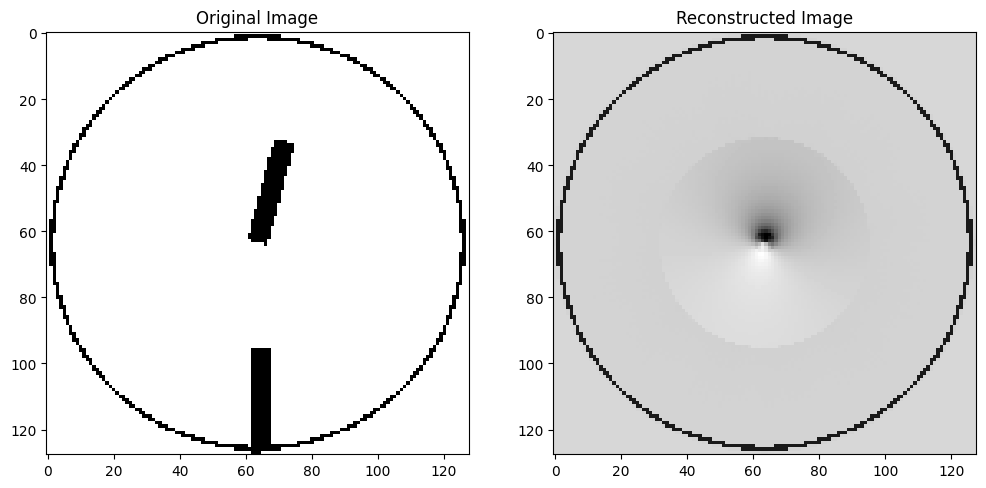

Text(0, 0.5, 'Principal Component 2')

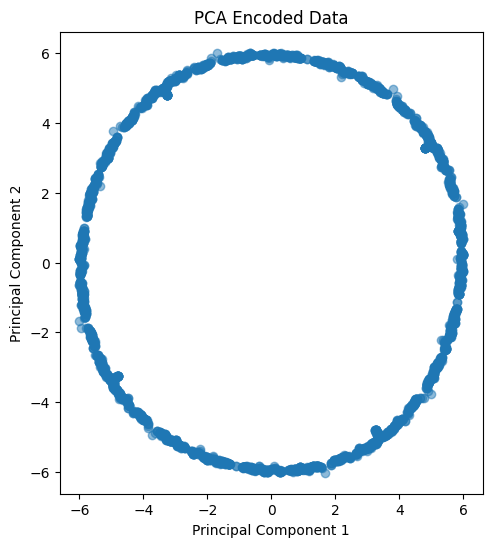

: 

In [ ]:
pca = PCAAutoencoder(n_components=2)
imgs = imgs.reshape(imgs.shape[0], -1)
pca.fit(imgs.numpy())

# Encode
Z = pca.encoder(imgs.numpy())
print(Z.shape)
# Decode
X_reconstructed = pca.decoder(Z)
print(X_reconstructed.shape)

idx = np.random.randint(0, imgs.shape[0])

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imgs[idx].reshape(128, 128), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(X_reconstructed[idx].reshape(128, 128), cmap='gray')
plt.title('Reconstructed Image')
plt.show()
# Plot PCA components
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.5)
plt.title('PCA Encoded Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [3]:
import functools
import numpy as np
import torch.nn as nn
import torch 

class C:
  
  def __init__(self, a=0, b=0, c=0):
    self.a = a
    self.b = b
    self.c = c
    

args = dict(c=3)
c = functools.partial(C, a=1, b=2, **args)

print(c())  


conv = nn.ConvTranspose2d(1, 1, kernel_size=3, stride=1, padding=1)
avg = nn.AvgPool2d(kernel_size=3, stride=1, padding=1)

x = torch.randn(1, 1, 4, 4)
print(x.shape)
y = avg(x)
print(y.shape)

torch.Size([1, 1, 4, 4])
torch.Size([1, 1, 4, 4])


: 